In [23]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [24]:
training_data = datasets.MNIST(root=".", train=True, download=True, transform=ToTensor())

test_data = datasets.MNIST(root=".", train=False, download=True, transform=ToTensor())

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 42404334.34it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1079592.65it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 9753192.68it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 4922617.25it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



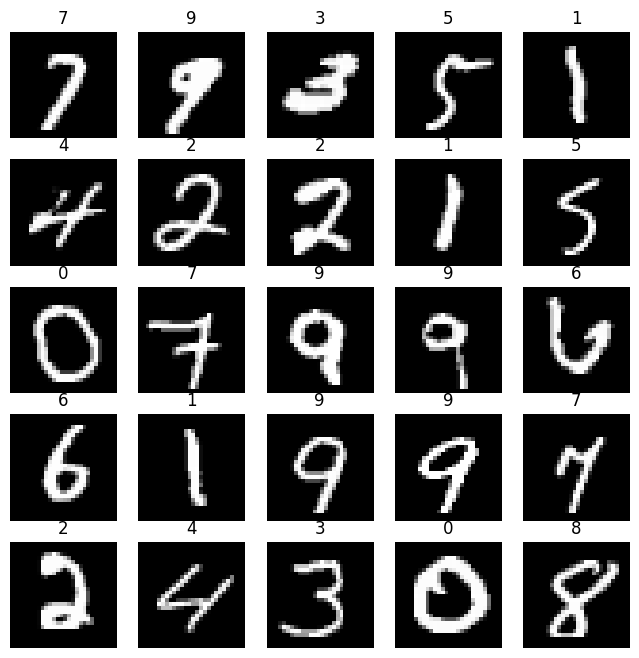

In [27]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [28]:
from torch.utils.data import DataLoader

loaded_train = DataLoader(training_data, batch_size=64, shuffle=True)
loaded_test = DataLoader(test_data, batch_size=64, shuffle=True)

In [29]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            )

    def forward(self, x):
      x = self.flatten(x)
      logits = self.linear_relu_stack(x)
      return logits

In [30]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [31]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [34]:
def train(dataloader, model, loss_function, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
      pred = model(X)
      loss = loss_function(pred, y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch:
        loss, current = loss.item(), batch * len(X)
        print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [35]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [36]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaded_train, model, loss_function, optimizer)
    test(loaded_test, model, loss_function)
print("Done!")

Epoch 1
-------------------------------
loss: 2.310554 [   64/60000]
loss: 2.307700 [  128/60000]
loss: 2.298532 [  192/60000]
loss: 2.299378 [  256/60000]
loss: 2.291399 [  320/60000]
loss: 2.294406 [  384/60000]
loss: 2.298078 [  448/60000]
loss: 2.296884 [  512/60000]
loss: 2.299812 [  576/60000]
loss: 2.299239 [  640/60000]
loss: 2.294774 [  704/60000]
loss: 2.296292 [  768/60000]
loss: 2.297958 [  832/60000]
loss: 2.303867 [  896/60000]
loss: 2.296120 [  960/60000]
loss: 2.300824 [ 1024/60000]
loss: 2.302585 [ 1088/60000]
loss: 2.301578 [ 1152/60000]
loss: 2.299233 [ 1216/60000]
loss: 2.292991 [ 1280/60000]
loss: 2.301053 [ 1344/60000]
loss: 2.299368 [ 1408/60000]
loss: 2.295286 [ 1472/60000]
loss: 2.296285 [ 1536/60000]
loss: 2.292418 [ 1600/60000]
loss: 2.298326 [ 1664/60000]
loss: 2.303915 [ 1728/60000]
loss: 2.294317 [ 1792/60000]
loss: 2.295289 [ 1856/60000]
loss: 2.288830 [ 1920/60000]
loss: 2.302858 [ 1984/60000]
loss: 2.293275 [ 2048/60000]
loss: 2.300042 [ 2112/60000]
los